In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import tkinter as tk
from tkinter import messagebox
from tkinter import filedialog
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [7]:
figuras = []


def obter_parametros_onda(numero):
    if numero == 1:
        frequencia = float(entry_frequencia1.get())
        amplitude = float(entry_amplitude1.get())
        fase = float(entry_fase1.get())
    elif numero == 2:
        frequencia = float(entry_frequencia2.get())
        amplitude = float(entry_amplitude2.get())
        fase = float(entry_fase2.get())
    return frequencia, amplitude, fase


def plotar_grafico_onda(t, ondas, titulo, cores, infos, linhas, opacidade, container):
    for widget in container.winfo_children():
        widget.destroy()

    fig = Figure(figsize=(8, 4))
    ax = fig.add_subplot(111)

    for i, onda in enumerate(ondas):
        ax.plot(
            t,
            onda,
            color=cores[i],
            label=infos[i],
            linestyle=linhas[i],
            alpha=opacidade[i],
        )

    ax.set_title(titulo)
    ax.set_xlabel("Tempo")
    ax.set_ylabel("Amplitude")
    ax.grid(True)
    ax.legend()

    canvas = FigureCanvasTkAgg(fig, master=container)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # Adicionar a figura à lista
    figuras.append(fig)


def plotar_graficos():
    try:
        figuras.clear()

        frequencia1, amplitude1, fase1 = obter_parametros_onda(1)
        frequencia2, amplitude2, fase2 = obter_parametros_onda(2)

        t = np.linspace(0, 2 * np.pi, 1000)

        onda1 = amplitude1 * np.sin(2 * np.pi * frequencia1 * t + fase1)
        onda2 = amplitude2 * np.sin(2 * np.pi * frequencia2 * t + fase2)

        interferencia_construtiva = onda1 + onda2
        interferencia_destrutiva = onda1 - onda2

        info_onda1 = (
            f"Amplitude: {amplitude1}\nFrequência: {frequencia1} Hz\nFase: {fase1} rad"
        )
        info_onda2 = (
            f"Amplitude: {amplitude2}\nFrequência: {frequencia2} Hz\nFase: {fase2} rad"
        )
        info_interf_construtiva = "Interferência Construtiva"
        info_interf_destrutiva = "Interferência Destrutiva"

        ondas = [onda1, onda2, interferencia_construtiva, interferencia_destrutiva]
        cores = ["blue", "orange", "green", "red"]
        linhas = ["-", "-", "--", "--"]
        opacidades = [1, 1, 0.25, 0.25]
        infos = [
            info_onda1,
            info_onda2,
            info_interf_construtiva,
            info_interf_destrutiva,
        ]

        plotar_grafico_onda(
            t,
            [ondas[0]],
            "Onda 1",
            [cores[0]],
            [infos[0]],
            [linhas[0]],
            [opacidades[0]],
            frame_onda1,
        )

        plotar_grafico_onda(
            t,
            [ondas[1]],
            "Onda 2",
            [cores[1]],
            [infos[1]],
            [linhas[1]],
            [opacidades[1]],
            frame_onda2,
        )

        plotar_grafico_onda(
            t,
            [ondas[2]],
            "Interferência Construtiva",
            [cores[2]],
            [infos[2]],
            [linhas[2]],
            [opacidades[2]],
            frame_interf_construtiva,
        )

        plotar_grafico_onda(
            t,
            [ondas[3]],
            "Interferência Destrutiva",
            [cores[3]],
            [infos[3]],
            [linhas[3]],
            [opacidades[3]],
            frame_interf_destrutiva,
        )

        plotar_grafico_onda(
            t,
            ondas,
            "Todas as Ondas",
            cores,
            infos,
            linhas,
            opacidades,
            frame_todas_as_ondas,
        )

        frame_principal.update_idletasks()
        canvas.configure(scrollregion=canvas.bbox("all"))

    except ValueError:
        messagebox.showerror(
            "Erro", "Certifique-se de preencher todos os campos com valores numéricos."
        )


def salvar_todos_pdfs():
    nome_arquivo = filedialog.asksaveasfilename(
        defaultextension=".pdf", filetypes=[("Arquivo PDF", "*.pdf")]
    )
    if nome_arquivo:
        with PdfPages(nome_arquivo) as pdf:
            for fig in figuras:
                pdf.savefig(fig)


def reiniciar_aplicacao():
    for widget in root.winfo_children():
        widget.destroy()

    criar_interface()


def criar_interface():
    global entry_frequencia1, entry_amplitude1, entry_fase1
    global entry_frequencia2, entry_amplitude2, entry_fase2
    global frame_principal, canvas, frame_graficos
    global frame_onda1, frame_onda2, frame_interf_construtiva, frame_interf_destrutiva, frame_todas_as_ondas

    frame_principal = tk.Frame(root)
    frame_principal.pack(fill=tk.BOTH, expand=1)

    canvas = tk.Canvas(frame_principal)
    canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

    scrollbar = tk.Scrollbar(frame_principal, orient=tk.VERTICAL, command=canvas.yview)
    scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

    canvas.configure(yscrollcommand=scrollbar.set)

    frame_graficos = tk.Frame(canvas)
    canvas.create_window((0, 0), window=frame_graficos, anchor=tk.NW)

    frame_onda1 = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_onda1.grid(row=0, column=0, padx=10, pady=10)

    label_frequencia1 = tk.Label(frame_onda1, text="Frequência (Hz) Onda 1:")
    label_frequencia1.grid(row=0, column=0, padx=5, pady=5)
    entry_frequencia1 = tk.Entry(frame_onda1)
    entry_frequencia1.grid(row=0, column=1)

    label_amplitude1 = tk.Label(frame_onda1, text="Amplitude Onda 1:")
    label_amplitude1.grid(row=1, column=0, padx=5, pady=5)
    entry_amplitude1 = tk.Entry(frame_onda1)
    entry_amplitude1.grid(row=1, column=1)

    label_fase1 = tk.Label(frame_onda1, text="Fase (radianos) Onda 1:")
    label_fase1.grid(row=2, column=0, padx=5, pady=5)
    entry_fase1 = tk.Entry(frame_onda1)
    entry_fase1.grid(row=2, column=1)

    frame_onda2 = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_onda2.grid(row=1, column=0, padx=10, pady=10)

    label_frequencia2 = tk.Label(frame_onda2, text="Frequência (Hz) Onda 2:")
    label_frequencia2.grid(row=0, column=0, padx=5, pady=5)
    entry_frequencia2 = tk.Entry(frame_onda2)
    entry_frequencia2.grid(row=0, column=1)

    label_amplitude2 = tk.Label(frame_onda2, text="Amplitude Onda 2:")
    label_amplitude2.grid(row=1, column=0, padx=5, pady=5)
    entry_amplitude2 = tk.Entry(frame_onda2)
    entry_amplitude2.grid(row=1, column=1)

    label_fase2 = tk.Label(frame_onda2, text="Fase (radianos) Onda 2:")
    label_fase2.grid(row=2, column=0, padx=5, pady=5)
    entry_fase2 = tk.Entry(frame_onda2)
    entry_fase2.grid(row=2, column=1)

    frame_interf_construtiva = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_interf_construtiva.grid(row=2, column=0, padx=10, pady=10)

    frame_interf_destrutiva = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_interf_destrutiva.grid(row=3, column=0, padx=10, pady=10)

    frame_todas_as_ondas = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_todas_as_ondas.grid(row=4, column=0, padx=10, pady=10)

    botao_plotar = tk.Button(root, text="Plotar Gráficos", command=plotar_graficos)
    botao_plotar.pack(pady=10)

    botao_salvar_todos = tk.Button(
        root, text="Salvar Todos os Gráficos em PDF", command=salvar_todos_pdfs
    )
    botao_salvar_todos.pack(pady=10)

    botao_reiniciar = tk.Button(root, text="Reiniciar", command=reiniciar_aplicacao)
    botao_reiniciar.pack(pady=10)


root = tk.Tk()
root.title("Simulador de Ondas")
root.geometry("1000x800")

criar_interface()

root.mainloop()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

figuras = []


def obter_parametros_onda(numero):
    if numero == 1:
        frequencia = float(entry_frequencia1.get())
        amplitude = float(entry_amplitude1.get())
        fase = float(entry_fase1.get())
    elif numero == 2:
        frequencia = float(entry_frequencia2.get())
        amplitude = float(entry_amplitude2.get())
        fase = float(entry_fase2.get())
    return frequencia, amplitude, fase


def plotar_grafico_onda(t, ondas, titulo, cores, infos, linhas, opacidade, container):
    for widget in container.winfo_children():
        widget.destroy()

    fig = Figure(figsize=(8, 4))
    ax = fig.add_subplot(111)

    for i, onda in enumerate(ondas):
        ax.plot(
            t,
            onda,
            color=cores[i],
            label=infos[i],
            linestyle=linhas[i],
            alpha=opacidade[i],
        )

    ax.set_title(titulo)
    ax.set_xlabel("Tempo")
    ax.set_ylabel("Amplitude")
    ax.grid(True)
    ax.legend()

    canvas = FigureCanvasTkAgg(fig, master=container)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    figuras.append(fig)


def plotar_graficos():
    try:
        figuras.clear()

        frequencia1, amplitude1, fase1 = obter_parametros_onda(1)
        frequencia2, amplitude2, fase2 = obter_parametros_onda(2)

        t = np.linspace(0, 2 * np.pi, 1000)

        onda1 = amplitude1 * np.sin(2 * np.pi * frequencia1 * t + fase1)
        onda2 = amplitude2 * np.sin(2 * np.pi * frequencia2 * t + fase2)

        interferencia_construtiva = onda1 + onda2
        interferencia_destrutiva = onda1 - onda2

        info_onda1 = (
            f"Amplitude: {amplitude1}\nFrequência: {frequencia1} Hz\nFase: {fase1} rad"
        )
        info_onda2 = (
            f"Amplitude: {amplitude2}\nFrequência: {frequencia2} Hz\nFase: {fase2} rad"
        )
        info_interf_construtiva = "Interferência Construtiva"
        info_interf_destrutiva = "Interferência Destrutiva"

        ondas = [onda1, onda2, interferencia_construtiva, interferencia_destrutiva]
        cores = ["blue", "orange", "green", "red"]
        linhas = ["-", "-", "--", "--"]
        opacidades = [1, 1, 0.25, 0.25]
        infos = [
            info_onda1,
            info_onda2,
            info_interf_construtiva,
            info_interf_destrutiva,
        ]

        plotar_grafico_onda(
            t,
            [ondas[0]],
            "Onda 1",
            [cores[0]],
            [infos[0]],
            [linhas[0]],
            [opacidades[0]],
            frame_onda1,
        )
        plotar_grafico_onda(
            t,
            [ondas[1]],
            "Onda 2",
            [cores[1]],
            [infos[1]],
            [linhas[1]],
            [opacidades[1]],
            frame_onda2,
        )
        plotar_grafico_onda(
            t,
            [ondas[2]],
            "Interferência Construtiva",
            [cores[2]],
            [infos[2]],
            [linhas[2]],
            [opacidades[2]],
            frame_interf_construtiva,
        )
        plotar_grafico_onda(
            t,
            [ondas[3]],
            "Interferência Destrutiva",
            [cores[3]],
            [infos[3]],
            [linhas[3]],
            [opacidades[3]],
            frame_interf_destrutiva,
        )
        plotar_grafico_onda(
            t,
            ondas,
            "Todas as Ondas",
            cores,
            infos,
            linhas,
            opacidades,
            frame_todas_as_ondas,
        )

        frame_principal.update_idletasks()
        canvas.configure(scrollregion=canvas.bbox("all"))

    except ValueError:
        messagebox.showerror(
            "Erro", "Certifique-se de preencher todos os campos com valores numéricos."
        )


def salvar_todos_pdfs():
    nome_arquivo = filedialog.asksaveasfilename(
        defaultextension=".pdf", filetypes=[("Arquivo PDF", "*.pdf")]
    )
    if nome_arquivo:
        with PdfPages(nome_arquivo) as pdf:
            for fig in figuras:
                pdf.savefig(fig)


def reiniciar_aplicacao():
    for widget in root.winfo_children():
        widget.destroy()
    criar_interface()


def criar_interface():
    global entry_frequencia1, entry_amplitude1, entry_fase1
    global entry_frequencia2, entry_amplitude2, entry_fase2
    global frame_principal, canvas, frame_graficos
    global frame_onda1, frame_onda2, frame_interf_construtiva, frame_interf_destrutiva, frame_todas_as_ondas

    frame_principal = tk.Frame(root)
    frame_principal.pack(fill=tk.BOTH, expand=1)

    canvas = tk.Canvas(frame_principal)
    canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

    scrollbar = tk.Scrollbar(frame_principal, orient=tk.VERTICAL, command=canvas.yview)
    scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

    canvas.configure(yscrollcommand=scrollbar.set)

    frame_graficos = tk.Frame(canvas)
    canvas.create_window((0, 0), window=frame_graficos, anchor=tk.NW)

    frame_onda1 = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_onda1.grid(row=0, column=0, padx=10, pady=10)

    label_frequencia1 = tk.Label(frame_onda1, text="Frequência (Hz) Onda 1:")
    label_frequencia1.grid(row=0, column=0, padx=5, pady=5)
    entry_frequencia1 = tk.Entry(frame_onda1)
    entry_frequencia1.grid(row=0, column=1)

    label_amplitude1 = tk.Label(frame_onda1, text="Amplitude Onda 1:")
    label_amplitude1.grid(row=1, column=0, padx=5, pady=5)
    entry_amplitude1 = tk.Entry(frame_onda1)
    entry_amplitude1.grid(row=1, column=1)

    label_fase1 = tk.Label(frame_onda1, text="Fase (radianos) Onda 1:")
    label_fase1.grid(row=2, column=0, padx=5, pady=5)
    entry_fase1 = tk.Entry(frame_onda1)
    entry_fase1.grid(row=2, column=1)

    frame_onda2 = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_onda2.grid(row=1, column=0, padx=10, pady=10)

    label_frequencia2 = tk.Label(frame_onda2, text="Frequência (Hz) Onda 2:")
    label_frequencia2.grid(row=0, column=0, padx=5, pady=5)
    entry_frequencia2 = tk.Entry(frame_onda2)
    entry_frequencia2.grid(row=0, column=1)

    label_amplitude2 = tk.Label(frame_onda2, text="Amplitude Onda 2:")
    label_amplitude2.grid(row=1, column=0, padx=5, pady=5)
    entry_amplitude2 = tk.Entry(frame_onda2)
    entry_amplitude2.grid(row=1, column=1)

    label_fase2 = tk.Label(frame_onda2, text="Fase (radianos) Onda 2:")
    label_fase2.grid(row=2, column=0, padx=5, pady=5)
    entry_fase2 = tk.Entry(frame_onda2)
    entry_fase2.grid(row=2, column=1)

    frame_interf_construtiva = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_interf_construtiva.grid(row=2, column=0, padx=10, pady=10)

    frame_interf_destrutiva = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_interf_destrutiva.grid(row=3, column=0, padx=10, pady=10)

    frame_todas_as_ondas = tk.Frame(frame_graficos, padx=10, pady=10)
    frame_todas_as_ondas.grid(row=4, column=0, padx=10, pady=10)

    botao_plotar = tk.Button(root, text="Plotar Gráficos", command=plotar_graficos)
    botao_plotar.pack(pady=10)

    botao_salvar_todos = tk.Button(
        root, text="Salvar Todos os Gráficos em PDF", command=salvar_todos_pdfs
    )
    botao_salvar_todos.pack(pady=10)

    botao_reiniciar = tk.Button(root, text="Reiniciar", command=reiniciar_aplicacao)
    botao_reiniciar.pack(pady=10)

    botao_simulacao_tempo_real = tk.Button(
        root, text="Simulação em Tempo Real", command=abrir_simulacao_tempo_real
    )
    botao_simulacao_tempo_real.pack(pady=10)


def abrir_simulacao_tempo_real():
    sim_root = tk.Toplevel(root)
    sim_root.title("Simulação em Tempo Real")

    fig, ax = plt.subplots(figsize=(10, 6))
    canvas = FigureCanvasTkAgg(fig, master=sim_root)
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    control_frame = tk.Frame(sim_root)
    control_frame.pack(side=tk.BOTTOM, fill=tk.X)

    def update_plot():
        amplitude1 = amp1_slider.get()
        frequencia1 = freq1_slider.get()
        fase1 = fase1_slider.get() * np.pi / 180

        amplitude2 = amp2_slider.get()
        frequencia2 = freq2_slider.get()
        fase2 = fase2_slider.get() * np.pi / 180

        t = np.linspace(0, 2 * np.pi, 1000)
        onda1 = amplitude1 * np.sin(frequencia1 * t + fase1)
        onda2 = amplitude2 * np.sin(frequencia2 * t + fase2)
        onda_resultante = onda1 + onda2

        ax.clear()
        ax.plot(t, onda1, label="Onda 1")
        ax.plot(t, onda2, label="Onda 2")
        ax.plot(t, onda_resultante, label="Interferência Resultante", linestyle="--")
        ax.legend()
        ax.set_xlabel("Tempo")
        ax.set_ylabel("Amplitude")
        ax.set_title("Interferência Entre Ondas")
        canvas.draw()

    tk.Label(control_frame, text="Amplitude 1:").pack(side=tk.LEFT)
    amp1_slider = tk.Scale(
        control_frame,
        from_=0,
        to=2,
        resolution=0.1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    amp1_slider.set(1)
    amp1_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Frequência 1:").pack(side=tk.LEFT)
    freq1_slider = tk.Scale(
        control_frame,
        from_=0.1,
        to=5,
        resolution=0.1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    freq1_slider.set(1)
    freq1_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Fase 1 (graus):").pack(side=tk.LEFT)
    fase1_slider = tk.Scale(
        control_frame,
        from_=0,
        to=360,
        resolution=1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    fase1_slider.set(0)
    fase1_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Amplitude 2:").pack(side=tk.LEFT)
    amp2_slider = tk.Scale(
        control_frame,
        from_=0,
        to=2,
        resolution=0.1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    amp2_slider.set(1)
    amp2_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Frequência 2:").pack(side=tk.LEFT)
    freq2_slider = tk.Scale(
        control_frame,
        from_=0.1,
        to=5,
        resolution=0.1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    freq2_slider.set(1)
    freq2_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Fase 2 (graus):").pack(side=tk.LEFT)
    fase2_slider = tk.Scale(
        control_frame,
        from_=0,
        to=360,
        resolution=1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    fase2_slider.set(90)
    fase2_slider.pack(side=tk.LEFT)

    update_plot()


root = tk.Tk()
root.title("Simulador de Ondas")
root.geometry("1000x800")

criar_interface()

root.mainloop()

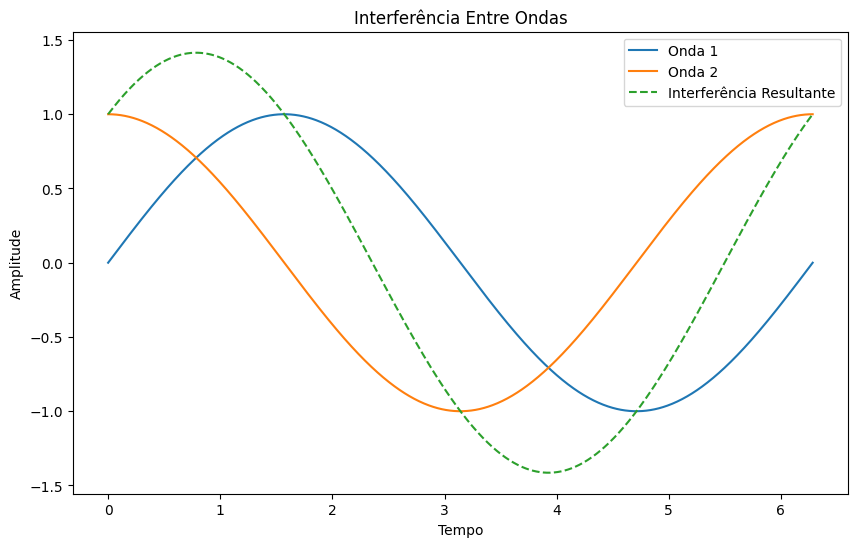

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from matplotlib.backends.backend_pdf import PdfPages
import tkinter as tk
from tkinter import ttk, filedialog, messagebox

figuras = []

def obter_parametros_onda(numero):
    if numero == 1:
        frequencia = float(entry_frequencia1.get())
        amplitude = float(entry_amplitude1.get())
        fase = float(entry_fase1.get())
    elif numero == 2:
        frequencia = float(entry_frequencia2.get())
        amplitude = float(entry_amplitude2.get())
        fase = float(entry_fase2.get())
    return frequencia, amplitude, fase

def plotar_grafico_onda(t, ondas, titulo, cores, infos, linhas, opacidade, container):
    for widget in container.winfo_children():
        widget.destroy()

    fig = Figure(figsize=(8, 4))
    ax = fig.add_subplot(111)

    for i, onda in enumerate(ondas):
        ax.plot(
            t,
            onda,
            color=cores[i],
            label=infos[i],
            linestyle=linhas[i],
            alpha=opacidade[i],
        )

    ax.set_title(titulo)
    ax.set_xlabel("Tempo")
    ax.set_ylabel("Amplitude")
    ax.grid(True)
    ax.legend()

    canvas = FigureCanvasTkAgg(fig, master=container)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    figuras.append(fig)

def plotar_graficos():
    try:
        figuras.clear()

        frequencia1, amplitude1, fase1 = obter_parametros_onda(1)
        frequencia2, amplitude2, fase2 = obter_parametros_onda(2)

        t = np.linspace(0, 2 * np.pi, 1000)

        onda1 = amplitude1 * np.sin(2 * np.pi * frequencia1 * t + fase1)
        onda2 = amplitude2 * np.sin(2 * np.pi * frequencia2 * t + fase2)

        interferencia_construtiva = onda1 + onda2
        interferencia_destrutiva = onda1 - onda2

        info_onda1 = (
            f"Amplitude: {amplitude1}\nFrequência: {frequencia1} Hz\nFase: {fase1} rad"
        )
        info_onda2 = (
            f"Amplitude: {amplitude2}\nFrequência: {frequencia2} Hz\nFase: {fase2} rad"
        )
        info_interf_construtiva = "Interferência Construtiva"
        info_interf_destrutiva = "Interferência Destrutiva"

        ondas = [onda1, onda2, interferencia_construtiva, interferencia_destrutiva]
        cores = ["blue", "orange", "green", "red"]
        linhas = ["-", "-", "--", "--"]
        opacidades = [1, 1, 0.25, 0.25]
        infos = [
            info_onda1,
            info_onda2,
            info_interf_construtiva,
            info_interf_destrutiva,
        ]

        plotar_grafico_onda(
            t,
            [ondas[0]],
            "Onda 1",
            [cores[0]],
            [infos[0]],
            [linhas[0]],
            [opacidades[0]],
            frame_onda1,
        )
        plotar_grafico_onda(
            t,
            [ondas[1]],
            "Onda 2",
            [cores[1]],
            [infos[1]],
            [linhas[1]],
            [opacidades[1]],
            frame_onda2,
        )
        plotar_grafico_onda(
            t,
            [ondas[2]],
            "Interferência Construtiva",
            [cores[2]],
            [infos[2]],
            [linhas[2]],
            [opacidades[2]],
            frame_interf_construtiva,
        )
        plotar_grafico_onda(
            t,
            [ondas[3]],
            "Interferência Destrutiva",
            [cores[3]],
            [infos[3]],
            [linhas[3]],
            [opacidades[3]],
            frame_interf_destrutiva,
        )
        plotar_grafico_onda(
            t,
            ondas,
            "Todas as Ondas",
            cores,
            infos,
            linhas,
            opacidades,
            frame_todas_as_ondas,
        )

        frame_principal.update_idletasks()
        canvas.configure(scrollregion=canvas.bbox("all"))

    except ValueError:
        messagebox.showerror(
            "Erro", "Certifique-se de preencher todos os campos com valores numéricos."
        )

def salvar_todos_pdfs():
    nome_arquivo = filedialog.asksaveasfilename(
        defaultextension=".pdf", filetypes=[("Arquivo PDF", "*.pdf")]
    )
    if nome_arquivo:
        with PdfPages(nome_arquivo) as pdf:
            for fig in figuras:
                pdf.savefig(fig)

def reiniciar_aplicacao():
    for widget in root.winfo_children():
        widget.destroy()
    criar_interface()

def criar_interface():
    global entry_frequencia1, entry_amplitude1, entry_fase1
    global entry_frequencia2, entry_amplitude2, entry_fase2
    global frame_principal, canvas, frame_graficos
    global frame_onda1, frame_onda2, frame_interf_construtiva, frame_interf_destrutiva, frame_todas_as_ondas
    global frame_personalizado, frame_simulacao

    frame_principal = tk.Frame(root)
    frame_principal.pack(fill=tk.BOTH, expand=1)

    canvas = tk.Canvas(frame_principal)
    canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=1)
    scrollbar = tk.Scrollbar(frame_principal, orient=tk.VERTICAL, command=canvas.yview)
    scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
    canvas.configure(yscrollcommand=scrollbar.set)
    frame_graficos = tk.Frame(canvas)
    canvas.create_window((0, 0), window=frame_graficos, anchor=tk.NW)

    frame_personalizado = tk.Frame(frame_graficos, padx=10, pady=10)

    frame_onda1 = tk.Frame(frame_personalizado, padx=10, pady=10)
    frame_onda1.grid(row=0, column=0, padx=10, pady=10)
    tk.Label(frame_onda1, text="Frequência (Hz) Onda 1:").grid(
        row=0, column=0, padx=5, pady=5
    )
    entry_frequencia1 = tk.Entry(frame_onda1)
    entry_frequencia1.grid(row=0, column=1)
    tk.Label(frame_onda1, text="Amplitude Onda 1:").grid(
        row=1, column=0, padx=5, pady=5
    )
    entry_amplitude1 = tk.Entry(frame_onda1)
    entry_amplitude1.grid(row=1, column=1)
    tk.Label(frame_onda1, text="Fase (radianos) Onda 1:").grid(
        row=2, column=0, padx=5, pady=5
    )
    entry_fase1 = tk.Entry(frame_onda1)
    entry_fase1.grid(row=2, column=1)

    frame_onda2 = tk.Frame(frame_personalizado, padx=10, pady=10)
    frame_onda2.grid(row=1, column=0, padx=10, pady=10)
    tk.Label(frame_onda2, text="Frequência (Hz) Onda 2:").grid(
        row=0, column=0, padx=5, pady=5
    )
    entry_frequencia2 = tk.Entry(frame_onda2)
    entry_frequencia2.grid(row=0, column=1)
    tk.Label(frame_onda2, text="Amplitude Onda 2:").grid(
        row=1, column=0, padx=5, pady=5
    )
    entry_amplitude2 = tk.Entry(frame_onda2)
    entry_amplitude2.grid(row=1, column=1)
    tk.Label(frame_onda2, text="Fase (radianos) Onda 2:").grid(
        row=2, column=0, padx=5, pady=5
    )
    entry_fase2 = tk.Entry(frame_onda2)
    entry_fase2.grid(row=2, column=1)

    frame_interf_construtiva = tk.Frame(frame_personalizado, padx=10, pady=10)
    frame_interf_construtiva.grid(row=2, column=0, padx=10, pady=10)
    frame_interf_destrutiva = tk.Frame(frame_personalizado, padx=10, pady=10)
    frame_interf_destrutiva.grid(row=3, column=0, padx=10, pady=10)
    frame_todas_as_ondas = tk.Frame(frame_personalizado, padx=10, pady=10)
    frame_todas_as_ondas.grid(row=4, column=0, padx=10, pady=10)

    botao_plotar = tk.Button(
        frame_personalizado, text="Plotar Gráficos", command=plotar_graficos
    )
    botao_plotar.grid(row=5, column=0, pady=10)

    botao_salvar_todos = tk.Button(
        frame_personalizado,
        text="Salvar Todos os Gráficos em PDF",
        command=salvar_todos_pdfs,
    )
    botao_salvar_todos.grid(row=6, column=0, pady=10)

    botao_reiniciar = tk.Button(
        frame_personalizado, text="Reiniciar", command=reiniciar_aplicacao
    )
    botao_reiniciar.grid(row=7, column=0, pady=10)

    frame_simulacao = tk.Frame(frame_graficos, padx=10, pady=10)

    def update_plot():
        amplitude1 = amp1_slider.get()
        frequencia1 = freq1_slider.get()
        fase1 = fase1_slider.get() * np.pi / 180

        amplitude2 = amp2_slider.get()
        frequencia2 = freq2_slider.get()
        fase2 = fase2_slider.get() * np.pi / 180

        t = np.linspace(0, 2 * np.pi, 1000)
        onda1 = amplitude1 * np.sin(frequencia1 * t + fase1)
        onda2 = amplitude2 * np.sin(frequencia2 * t + fase2)
        onda_resultante = onda1 + onda2

        ax.clear()
        ax.plot(t, onda1, label="Onda 1")
        ax.plot(t, onda2, label="Onda 2")
        ax.plot(t, onda_resultante, label="Interferência Resultante", linestyle="--")
        ax.legend()
        ax.set_xlabel("Tempo")
        ax.set_ylabel("Amplitude")
        ax.set_title("Interferência Entre Ondas")
        canvas_simulacao.draw()

    fig, ax = plt.subplots(figsize=(10, 6))
    canvas_simulacao = FigureCanvasTkAgg(fig, master=frame_simulacao)
    canvas_simulacao.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    control_frame = tk.Frame(frame_simulacao)
    control_frame.pack(side=tk.BOTTOM, fill=tk.X)

    tk.Label(control_frame, text="Amplitude 1:").pack(side=tk.LEFT)
    amp1_slider = tk.Scale(
        control_frame,
        from_=0,
        to=2,
        resolution=0.1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    amp1_slider.set(1)
    amp1_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Frequência 1:").pack(side=tk.LEFT)
    freq1_slider = tk.Scale(
        control_frame,
        from_=0.1,
        to=5,
        resolution=0.1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    freq1_slider.set(1)
    freq1_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Fase 1 (graus):").pack(side=tk.LEFT)
    fase1_slider = tk.Scale(
        control_frame,
        from_=0,
        to=360,
        resolution=1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    fase1_slider.set(0)
    fase1_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Amplitude 2:").pack(side=tk.LEFT)
    amp2_slider = tk.Scale(
        control_frame,
        from_=0,
        to=2,
        resolution=0.1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    amp2_slider.set(1)
    amp2_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Frequência 2:").pack(side=tk.LEFT)
    freq2_slider = tk.Scale(
        control_frame,
        from_=0.1,
        to=5,
        resolution=0.1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    freq2_slider.set(1)
    freq2_slider.pack(side=tk.LEFT)

    tk.Label(control_frame, text="Fase 2 (graus):").pack(side=tk.LEFT)
    fase2_slider = tk.Scale(
        control_frame,
        from_=0,
        to=360,
        resolution=1,
        orient=tk.HORIZONTAL,
        command=lambda val: update_plot(),
    )
    fase2_slider.set(90)
    fase2_slider.pack(side=tk.LEFT)

    update_plot()

    def on_select(event):
        selected_option = combobox.get()
        if selected_option == "Personalizado":
            frame_personalizado.pack(fill=tk.BOTH, expand=1)
            frame_simulacao.pack_forget()
        elif selected_option == "Simulação em Tempo Real":
            frame_personalizado.pack_forget()
            frame_simulacao.pack(fill=tk.BOTH, expand=1)

    options = ["Personalizado", "Simulação em Tempo Real"]
    combobox = ttk.Combobox(frame_graficos, values=options, state="readonly")
    combobox.current(0)
    combobox.bind("<<ComboboxSelected>>", on_select)
    combobox.pack(pady=10)

    on_select(None)


root = tk.Tk()
root.title("Simulador de Ondas")
root.geometry("1000x800")

criar_interface()

root.mainloop()